<a href="https://colab.research.google.com/github/khalidjoulid/Multi-label-Classification/blob/main/Multi_label_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Les imports**

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam

In [ ]:
def charger_dataset():
  (trainX, trainY), (testX, testY)=cifar10.load_data()
  trainY=to_categorical(trainY)
  testY=to_categorical(testY)
  return trainX, trainY, testX, testY

trainX, trainY, testX, testY=charger_dataset()
print(np.shape(trainX), np.shape(trainY), np.shape(testX), np.shape(testY))

170500096/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


**Visualisation des exemples**

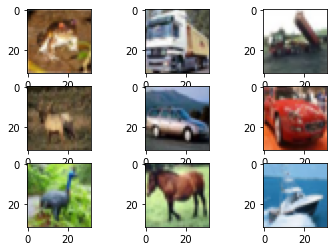

In [ ]:
for i in range(9):
  plt.subplot(330+ i+1)
  plt.imshow(trainX[i])
plt.show()


In [ ]:
trainX[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

**Préparation de la base de données**

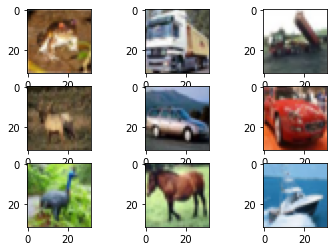

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [ ]:
def normalizationImage(trainX, testX):
  trainXNorm=trainX.astype('float32')
  testXNorm=testX.astype('float32')
  trainXNorm=trainXNorm/255.
  testXNorm=testXNorm/255.
  return trainXNorm, testXNorm
trainXNorm, testXNorm=normalizationImage(trainX, testX)

for i in range(9):
  plt.subplot(330+ i+1)
  plt.imshow(trainXNorm[i])
plt.show()

trainXNorm[0]

**Définition des trois modèles**

In [ ]:
# Deux couches de conv et une couche de maxpooling
def model1():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu', padding='same',input_shape=(32,32,3)))
  model.add(Conv2D(32,(3,3),activation='relu', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(128,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  opt=Adam(lr=0.001)
  model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
  return model

# Quatre couches de conv et deux couches de maxpooling
def model2():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu', padding='same',input_shape=(32,32,3)))
  model.add(Conv2D(32,(3,3),activation='relu', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
  model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(128,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  opt=Adam(lr=0.001)
  model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
  return model

# Quatre couches de conv et deux couches de maxpooling
def model3():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu', padding='same',input_shape=(32,32,3)))
  model.add(Conv2D(32,(3,3),activation='relu', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
  model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
  model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(128,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  opt=Adam(lr=0.001)
  model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
  return model  

**Visualisation des résultats**

In [ ]:
def visualisation(history):
  plt.subplot(211)
  plt.plot(history.history["loss"], color='blue', label='train')
  plt.plot(history.history["val_loss"], color='red', label='test')
  plt.title("Cross entropy loss")

  plt.subplot(212)
  plt.plot(history.history["accuracy"], color='blue', label='train')
  plt.plot(history.history["val_accuracy"], color='red', label='test')
  plt.title("Classification accuracy")

**Apprentissage + Evaluation**

Epoch 1/40
834/834 [==============================] - 7s 9ms/step - loss: 1.3864 - accuracy: 0.5078 - val_loss: 1.0996 - val_accuracy: 0.6116
Epoch 2/40
834/834 [==============================] - 7s 8ms/step - loss: 0.9994 - accuracy: 0.6504 - val_loss: 0.9912 - val_accuracy: 0.6528
Epoch 3/40
834/834 [==============================] - 7s 8ms/step - loss: 0.8578 - accuracy: 0.7000 - val_loss: 0.9280 - val_accuracy: 0.6790
Epoch 4/40
834/834 [==============================] - 7s 8ms/step - loss: 0.7502 - accuracy: 0.7386 - val_loss: 0.9478 - val_accuracy: 0.6696
Epoch 5/40
834/834 [==============================] - 7s 8ms/step - loss: 0.6629 - accuracy: 0.7682 - val_loss: 0.9647 - val_accuracy: 0.6713
Epoch 6/40
834/834 [==============================] - 7s 8ms/step - loss: 0.5686 - accuracy: 0.8004 - val_loss: 0.9890 - val_accuracy: 0.6759
Epoch 7/40
834/834 [==============================] - 7s 8ms/step - loss: 0.4776 - accuracy: 0.8331 - val_loss: 1.0299 - val_accuracy: 0.6782
Epoch 

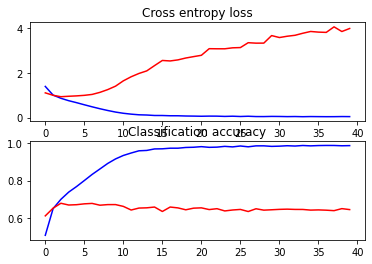

In [ ]:
def ApprentissageEvaluation():
  trainX, trainY, testX, testY=charger_dataset()
  trainXNorm, testXNorm=normalizationImage(trainX, testX)
  model=model1()
  history=model.fit(trainXNorm,trainY, epochs=40, batch_size=60, validation_data=(testXNorm, testY), verbose=1)
  error, acc=model.evaluate(testXNorm, testY)
  print("accuracy: ", acc)
  visualisation(history)

ApprentissageEvaluation()

##Techniques de régularisation

**Dropout**

In [ ]:
# Quatre couches de conv et deux couches de maxpooling
def model4():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu', padding='same',input_shape=(32,32,3)))
  model.add(Conv2D(32,(3,3),activation='relu', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  
  model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
  model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  
  model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
  model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  
  model.add(Flatten())
  model.add(Dense(128,activation='relu'))
  model.add(Dropout(0.2))
  
  model.add(Dense(10,activation='softmax'))
  opt=Adam(lr=0.001)
  model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
  return model  

Epoch 1/60
834/834 [==============================] - 15s 18ms/step - loss: 1.6723 - accuracy: 0.3785 - val_loss: 1.2643 - val_accuracy: 0.5454
Epoch 2/60
834/834 [==============================] - 15s 17ms/step - loss: 1.1814 - accuracy: 0.5764 - val_loss: 0.9862 - val_accuracy: 0.6519
Epoch 3/60
834/834 [==============================] - 15s 17ms/step - loss: 1.0006 - accuracy: 0.6460 - val_loss: 0.8750 - val_accuracy: 0.6944
Epoch 4/60
834/834 [==============================] - 15s 17ms/step - loss: 0.8815 - accuracy: 0.6889 - val_loss: 0.7910 - val_accuracy: 0.7223
Epoch 5/60
834/834 [==============================] - 14s 17ms/step - loss: 0.7927 - accuracy: 0.7216 - val_loss: 0.7977 - val_accuracy: 0.7186
Epoch 6/60
834/834 [==============================] - 15s 17ms/step - loss: 0.7331 - accuracy: 0.7433 - val_loss: 0.7296 - val_accuracy: 0.7434
Epoch 7/60
834/834 [==============================] - 15s 17ms/step - loss: 0.6816 - accuracy: 0.7600 - val_loss: 0.6793 - val_accuracy:

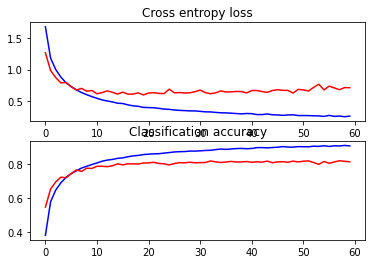

In [ ]:
def ApprentissageEvaluation():
  trainX, trainY, testX, testY=charger_dataset()
  trainXNorm, testXNorm=normalizationImage(trainX, testX)
  model=model4()
  history=model.fit(trainXNorm,trainY, epochs=60, batch_size=60, validation_data=(testXNorm, testY), verbose=1)
  error, acc=model.evaluate(testXNorm, testY)
  print("accuracy: ", acc)
  visualisation(history)

ApprentissageEvaluation()

**Weight Decay**

In [ ]:
from keras.regularizers import l2
def model5():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu', padding='same', kernel_regularizer=l2(0.001), input_shape=(32,32,3)))
  model.add(Conv2D(32,(3,3),activation='relu', kernel_regularizer=l2(0.001), padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(64,(3,3),activation='relu', kernel_regularizer=l2(0.001), padding='same'))
  model.add(Conv2D(64,(3,3),activation='relu', kernel_regularizer=l2(0.001), padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(128,(3,3),activation='relu', kernel_regularizer=l2(0.001), padding='same'))
  model.add(Conv2D(128,(3,3),activation='relu', kernel_regularizer=l2(0.001), padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(128,activation='relu', kernel_regularizer=l2(0.001)))
  model.add(Dense(10,activation='softmax'))
  opt=Adam(lr=0.001)
  model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
  return model  

Epoch 1/60
834/834 [==============================] - 15s 18ms/step - loss: 1.7982 - accuracy: 0.3709 - val_loss: 1.5440 - val_accuracy: 0.4728
Epoch 2/60
834/834 [==============================] - 14s 17ms/step - loss: 1.4064 - accuracy: 0.5347 - val_loss: 1.3436 - val_accuracy: 0.5701
Epoch 3/60
834/834 [==============================] - 14s 17ms/step - loss: 1.2392 - accuracy: 0.6115 - val_loss: 1.2095 - val_accuracy: 0.6243
Epoch 4/60
834/834 [==============================] - 14s 17ms/step - loss: 1.1416 - accuracy: 0.6532 - val_loss: 1.1333 - val_accuracy: 0.6602
Epoch 5/60
834/834 [==============================] - 14s 17ms/step - loss: 1.0582 - accuracy: 0.6902 - val_loss: 1.1045 - val_accuracy: 0.6761
Epoch 6/60
834/834 [==============================] - 14s 17ms/step - loss: 1.0112 - accuracy: 0.7125 - val_loss: 1.0264 - val_accuracy: 0.7076
Epoch 7/60
834/834 [==============================] - 14s 17ms/step - loss: 0.9709 - accuracy: 0.7311 - val_loss: 1.0313 - val_accuracy:

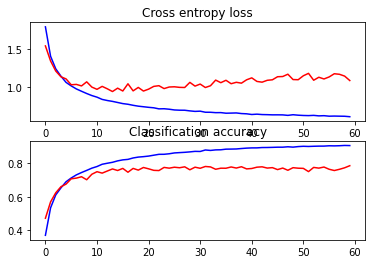

In [ ]:
def ApprentissageEvaluation():
  trainX, trainY, testX, testY=charger_dataset()
  trainXNorm, testXNorm=normalizationImage(trainX, testX)
  model=model5()
  history=model.fit(trainXNorm,trainY, epochs=60, batch_size=60, validation_data=(testXNorm, testY), verbose=1)
  error, acc=model.evaluate(testXNorm, testY)
  print("accuracy: ", acc)
  visualisation(history)

ApprentissageEvaluation()

**Dropout + Weight decay**

In [ ]:
def visualisation(history):
  plt.subplot(211)
  plt.plot(history.history["loss"], color='blue', label='train')
  plt.plot(history.history["val_loss"], color='red', label='test')
  plt.title("Cross entropy loss")

  plt.subplot(212)
  plt.plot(history.history["accuracy"], color='blue', label='train')
  plt.plot(history.history["val_accuracy"], color='red', label='test')
  plt.title("Classification accuracy")

In [ ]:
from keras.regularizers import l2
def model6():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu', kernel_regularizer=l2(0.001), padding='same',input_shape=(32,32,3)))
  model.add(Conv2D(32,(3,3),activation='relu', kernel_regularizer=l2(0.001), padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  
  model.add(Conv2D(64,(3,3),activation='relu', kernel_regularizer=l2(0.001), padding='same'))
  model.add(Conv2D(64,(3,3),activation='relu', kernel_regularizer=l2(0.001), padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  
  model.add(Conv2D(128,(3,3),activation='relu', kernel_regularizer=l2(0.001), padding='same'))
  model.add(Conv2D(128,(3,3),activation='relu',kernel_regularizer=l2(0.001), padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  
  model.add(Flatten())
  model.add(Dense(128,activation='relu', kernel_regularizer=l2(0.001)))
  model.add(Dropout(0.2))
  
  model.add(Dense(10,activation='softmax'))
  opt=Adam(lr=0.001)
  model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
  return model

Epoch 1/60
834/834 [==============================] - 16s 19ms/step - loss: 1.8714 - accuracy: 0.3515 - val_loss: 1.5130 - val_accuracy: 0.4948
Epoch 2/60
834/834 [==============================] - 15s 18ms/step - loss: 1.4775 - accuracy: 0.5126 - val_loss: 1.3794 - val_accuracy: 0.5549
Epoch 3/60
834/834 [==============================] - 15s 18ms/step - loss: 1.3438 - accuracy: 0.5733 - val_loss: 1.3281 - val_accuracy: 0.5916
Epoch 4/60
834/834 [==============================] - 15s 18ms/step - loss: 1.2602 - accuracy: 0.6153 - val_loss: 1.1914 - val_accuracy: 0.6426
Epoch 5/60
834/834 [==============================] - 15s 18ms/step - loss: 1.1877 - accuracy: 0.6466 - val_loss: 1.0955 - val_accuracy: 0.6815
Epoch 6/60
834/834 [==============================] - 15s 18ms/step - loss: 1.1321 - accuracy: 0.6706 - val_loss: 1.0435 - val_accuracy: 0.7062
Epoch 7/60
834/834 [==============================] - 15s 18ms/step - loss: 1.0893 - accuracy: 0.6916 - val_loss: 1.0456 - val_accuracy:

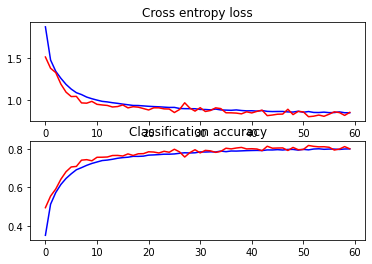

In [ ]:
def ApprentissageEvaluation():
  trainX, trainY, testX, testY=charger_dataset()
  trainXNorm, testXNorm=normalizationImage(trainX, testX)
  model=model6()
  history=model.fit(trainXNorm,trainY, epochs=60, batch_size=60, validation_data=(testXNorm, testY), verbose=1)
  error, acc=model.evaluate(testXNorm, testY)
  print("accuracy: ", acc)
  visualisation(history)

ApprentissageEvaluation()

**Augmentation offline de la base de données**

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/60
834/834 [==============================] - 21s 25ms/step - loss: 1.5896 - accuracy: 0.4148 - val_loss: 1.2705 - val_accuracy: 0.5336
Epoch 2/60
834/834 [==============================] - 21s 25ms/step - loss: 1.1245 - accuracy: 0.5999 - val_loss: 1.0900 - val_accuracy: 0.6197
Epoch 3/60
834/834 [==============================] - 21s 25ms/step - loss: 0.9406 - accuracy: 0.6671 - val_loss: 0.9012 - val_accuracy: 0.6908
Epoch 4/60
834/834 [==============================] - 21s 25ms/step - loss: 0.8277 - accuracy: 0.7083 - val_loss: 0.8228 - val_accuracy: 0.7171
Epoch 5/60
834/834 [==============================] - 21s 25ms/step - loss: 0.7518 - accuracy: 0.7369 - val_loss: 0.7372 - val_accuracy: 0.7417
Epoch 6/60
834/834 [==============================] - 20s 25ms/step - loss: 0.6942 - accuracy: 0.7595 - val_loss: 0.7184 - val_accuracy: 0.7583
Epoch 7/60
834/834 [==============================] - 20s 25

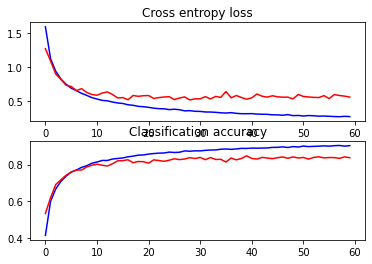

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

def ApprentissageEvaluation():
  trainX, trainY, testX, testY=charger_dataset()
  trainXNorm, testXNorm=normalizationImage(trainX, testX)
  datagen=ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
  aug_train=datagen.flow(trainXNorm, trainY, batch_size=60)
  model=model3()
  history=model.fit_generator(aug_train, epochs=60, validation_data=(testXNorm, testY), verbose=1)
  error, acc=model.evaluate(testXNorm, testY)
  print("accuracy: ", acc)
  visualisation(history)

ApprentissageEvaluation()

**Early stopping**

Epoch 1/60
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5187 - accuracy: 0.4391 - val_loss: 1.1719 - val_accuracy: 0.5913
Epoch 2/60
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9717 - accuracy: 0.6543 - val_loss: 0.9229 - val_accuracy: 0.6748
Epoch 3/60
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7639 - accuracy: 0.7331 - val_loss: 0.7781 - val_accuracy: 0.7256
Epoch 4/60
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6390 - accuracy: 0.7766 - val_loss: 0.7881 - val_accuracy: 0.7244
Epoch 5/60
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5484 - accuracy: 0.8058 - val_loss: 0.7096 - val_accuracy: 0.7622
Epoch 6/60
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4608 - accuracy: 0.8389 - val_loss: 0.7649 - val_accuracy: 0.7526
Epoch 7/60
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3996 - accuracy: 0.8576 - val_loss: 0.8293 - val_accuracy:

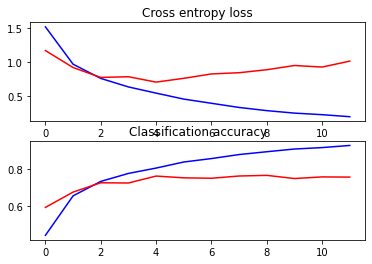

In [ ]:
from keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor="val_accuracy", patience=3)

from keras.preprocessing.image import ImageDataGenerator

def ApprentissageEvaluation():
  trainX, trainY, testX, testY=charger_dataset()
  trainXNorm, testXNorm=normalizationImage(trainX, testX)
  model=model3()
  history=model.fit(trainXNorm, trainY, epochs=60, validation_data=(testXNorm, testY), verbose=1, callbacks=[earlystop])
  error, acc=model.evaluate(testXNorm, testY)
  print("accuracy: ", acc)
  visualisation(history)

ApprentissageEvaluation()

**Data augmentation + Dropout + Weight decay**

In [ ]:
from keras.regularizers import l2
def model6():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu', kernel_regularizer=l2(0.001), padding='same',input_shape=(32,32,3)))
  model.add(Conv2D(32,(3,3),activation='relu', kernel_regularizer=l2(0.001), padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  
  model.add(Conv2D(64,(3,3),activation='relu', kernel_regularizer=l2(0.001), padding='same'))
  model.add(Conv2D(64,(3,3),activation='relu', kernel_regularizer=l2(0.001), padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  
  model.add(Conv2D(128,(3,3),activation='relu', kernel_regularizer=l2(0.001), padding='same'))
  model.add(Conv2D(128,(3,3),activation='relu',kernel_regularizer=l2(0.001), padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  
  model.add(Flatten())
  model.add(Dense(128,activation='relu', kernel_regularizer=l2(0.001)))
  model.add(Dropout(0.2))
  
  model.add(Dense(10,activation='softmax'))
  opt=Adam(lr=0.001)
  model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
  return model

Epoch 1/60
834/834 [==============================] - 21s 25ms/step - loss: 1.9277 - accuracy: 0.3152 - val_loss: 1.5674 - val_accuracy: 0.4548
Epoch 2/60
834/834 [==============================] - 21s 25ms/step - loss: 1.6008 - accuracy: 0.4521 - val_loss: 1.4313 - val_accuracy: 0.5204
Epoch 3/60
834/834 [==============================] - 21s 25ms/step - loss: 1.4930 - accuracy: 0.5057 - val_loss: 1.3186 - val_accuracy: 0.5776
Epoch 4/60
834/834 [==============================] - 21s 25ms/step - loss: 1.4218 - accuracy: 0.5403 - val_loss: 1.3101 - val_accuracy: 0.5845
Epoch 5/60
834/834 [==============================] - 21s 25ms/step - loss: 1.3744 - accuracy: 0.5625 - val_loss: 1.1946 - val_accuracy: 0.6386
Epoch 6/60
834/834 [==============================] - 21s 25ms/step - loss: 1.3271 - accuracy: 0.5867 - val_loss: 1.2049 - val_accuracy: 0.6330
Epoch 7/60
834/834 [==============================] - 21s 25ms/step - loss: 1.3003 - accuracy: 0.5978 - val_loss: 1.2140 - val_accuracy:

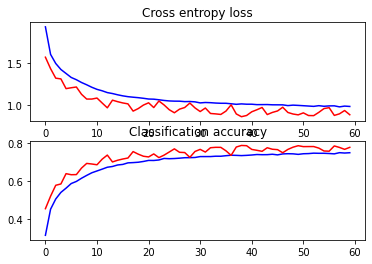

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

def ApprentissageEvaluation():
  trainX, trainY, testX, testY=charger_dataset()
  trainXNorm, testXNorm=normalizationImage(trainX, testX)
  datagen=ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
  aug_train=datagen.flow(trainXNorm, trainY, batch_size=60)
  model=model6()
  history=model.fit_generator(aug_train, epochs=60, validation_data=(testXNorm, testY), verbose=1)
  error, acc=model.evaluate(testXNorm, testY)
  print("accuracy: ", acc)
  visualisation(history)

ApprentissageEvaluation()